In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [12]:
# Directories
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/PRECEFF_TIMEAVG_CWP_FILTERED/'
basedir2 = '/xdisk/sylvia/temakgoale/DYAMOND/PRECEFF_CLOUD_ICE_WATER_TIMEAVG_CWP_FILTERED/'
#basedir = '/groups/sylvia/DYAMOND_PRECEFF/TIME_AVERAGING_CWP_FILTERED/'
#basedir2 = '/groups/sylvia/DYAMOND_PRECEFF/'

models = ['ERA5', 'FV3', 'GEOS5', 'ICON', 'NICAM', 'HadGEM3', 'SAM']
# Requested x-axis label format
labels = ['ERA5 (<1)', 'ERA5 (>1)', 'FV3 (<1)', 'FV3 (>1)', 'GEOS5 (<1)', 'GEOS5 (>1)', 'ICON (<1)', 'ICON (>1)', 'NICAM (<1)', 'NICAM (>1)', 'HadGEM3 (<1)', 'HadGEM3 (>1)', 'SAM (<1)', 'SAM (>1)']
#colors = ['blue', 'green', 'purple', 'red', 'cyan', 'yellow'] * 2
colors = ['black', 'black', 'blue','blue','green', 'green', 'purple','purple', 'red','red', 'cyan','cyan', 'yellow','yellow'] 

In [13]:
# Load and clean datasets in model-major, threshold-minor order

thresholds = ['less1', '1']

def clean_data(data):
    """Remove NaNs from dataset."""
    return [d[~np.isnan(d)] for d in data]

# === Initialize containers ===
dataset1, dataset2, dataset3 = [], [], []

# === Load and clean datasets ===
for model in models:
    for threshold in thresholds:
        # Dataset 1: Generic precipitation efficiency
        ds1 = xr.open_dataset(f"{basedir}{model}_PRECEFF_{threshold}mm_hr_20160809-20160909_Asia_timeavg.nc")
        dataset1 += clean_data([ds1['PRECEFF_TIMEAVG'][0].values])
        ds1.close()

        # Dataset 2: Cloud water path PE
        ds2 = xr.open_dataset(f"{basedir2}{model}_CLOUD_WATER_PATH_PRECEFF_{threshold}mm_hr_20160809-20160909_Asia_timeavg.nc")
        dataset2 += clean_data([ds2['PRECEFF_TIMEAVG'][0].values])
        ds2.close()

        # Dataset 3: Cloud ice path PE
        ds3 = xr.open_dataset(f"{basedir2}{model}_CLOUD_ICE_PATH_PRECEFF_{threshold}mm_hr_20160809-20160909_Asia_timeavg.nc")
        dataset3 += clean_data([ds3['PRECEFF_TIMEAVG'][0].values])
        ds3.close()

datasets = [dataset1, dataset2, dataset3]
y_labels = [r'$\epsilon$ [s$^{-1}$]', r'$\epsilon_{W}$ [s$^{-1}$]', r'$\epsilon_{I}$ [s$^{-1}$]']
y_lims = [(10**-5, 10**-2), (10**-5, 1), (10**-5, 1)]
titles = ['a', 'b', 'c']

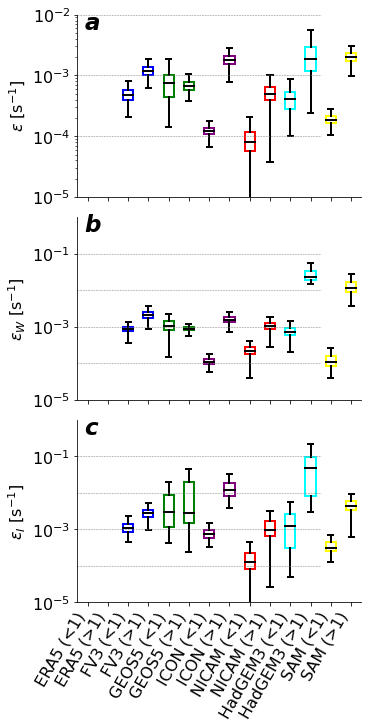

In [15]:
# Plotting
fs = 16
lw = 2
fig, axes = plt.subplots(3, 1, figsize=(5, 10), constrained_layout=True)
for i, (ax, data, y_label, ylim, title) in enumerate(zip(axes, datasets, y_labels, y_lims, titles)):
    box = ax.boxplot(data, patch_artist=True, showfliers=False)

    # Customize box colors and lines
    for patch, color in zip(box['boxes'], colors):
        patch.set(facecolor='white', edgecolor=color, linewidth=lw)
    for element in ['whiskers', 'caps', 'medians']:
        for item in box[element]:
            item.set(linewidth=lw, color='black' if element == 'medians' else item.get_color())

    # Plot horizontal lines
    ax.plot( [0.5, 12.5], [10**(-4), 10**(-4)], ls='--', lw=0.5, color='gray' )
    ax.plot( [0.5, 12.5], [10**(-3), 10**(-3)], ls='--', lw=0.5, color='gray' )
    ax.plot( [0.5, 12.5], [10**(-2), 10**(-2)], ls='--', lw=0.5, color='gray' )
    ax.plot( [0.5, 12.5], [10**(-1), 10**(-1)], ls='--', lw=0.5, color='gray' )
    
    # Set y-axis properties
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    ax.set_ylabel(y_label, fontsize=fs)
    ax.tick_params(axis='y', labelsize=fs)
    ax.text(0.025, 0.92, title, weight='bold', style='italic', transform=ax.transAxes, fontsize=fs+7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x-axis labels only for plot (c)
    if i < 2:
        ax.set_xticklabels([])
    else:
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, fontsize=fs, rotation=60, ha='right')

#plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_7_Box_whisker_Plots_CWP_filtered.png', dpi=50, bbox_inches='tight')
#plt.savefig("/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_7_Box_whisker_Plots_CWP_filtered.pdf", format="pdf", dpi=50, bbox_inches="tight")